In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import keras.utils as image
import os
import tensorflow as tf

import keras
from keras import layers


#from keras import ops

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Images and class labels

images_1 = pd.read_csv("drive/MyDrive/CUB_200_2011/images.txt",sep = None,names=['image_id' ,'image_name'],engine='python')
print(images_1)

train_test_split_1 =pd.read_csv("drive/MyDrive/CUB_200_2011/train_test_split.txt",sep = None,names=['image_id' ,'is_training_image'],engine='python')
print(train_test_split_1)

classes_1 =pd.read_csv("drive/MyDrive/CUB_200_2011/classes.txt",sep = None,names=['class_id', 'class_name'],engine='python')
print(classes_1)

image_class_labels_1 =pd.read_csv("drive/MyDrive/CUB_200_2011/image_class_labels.txt",sep = None,names=['image_id', 'class_id'],engine='python')
print(image_class_labels_1)


       image_id                                         image_name
0             1  001.Black_footed_Albatross/Black_Footed_Albatr...
1             2  001.Black_footed_Albatross/Black_Footed_Albatr...
2             3  001.Black_footed_Albatross/Black_Footed_Albatr...
3             4  001.Black_footed_Albatross/Black_Footed_Albatr...
4             5  001.Black_footed_Albatross/Black_Footed_Albatr...
...         ...                                                ...
11783     11784  200.Common_Yellowthroat/Common_Yellowthroat_00...
11784     11785  200.Common_Yellowthroat/Common_Yellowthroat_00...
11785     11786  200.Common_Yellowthroat/Common_Yellowthroat_00...
11786     11787  200.Common_Yellowthroat/Common_Yellowthroat_00...
11787     11788  200.Common_Yellowthroat/Common_Yellowthroat_00...

[11788 rows x 2 columns]
       image_id  is_training_image
0             1                  0
1             2                  1
2             3                  0
3             4               

In [ ]:
image_data_1 = pd.merge(images_1,train_test_split_1, on='image_id')
image_data_1 = pd.merge(image_data_1,image_class_labels_1, on='image_id')
image_data_1 = pd.merge(image_data_1,classes_1, on='class_id')
print(image_data_1.to_string())
print(len(image_data_1))

       image_id                                                                         image_name  is_training_image  class_id                          class_name      x      y  width  height
0             1                      001.Black_footed_Albatross/Black_Footed_Albatross_0046_18.jpg                  0         1          001.Black_footed_Albatross   60.0   27.0  325.0   304.0
1             2                      001.Black_footed_Albatross/Black_Footed_Albatross_0009_34.jpg                  1         1          001.Black_footed_Albatross  139.0   30.0  153.0   264.0
2             3                      001.Black_footed_Albatross/Black_Footed_Albatross_0002_55.jpg                  0         1          001.Black_footed_Albatross   14.0  112.0  388.0   186.0
3             4                      001.Black_footed_Albatross/Black_Footed_Albatross_0074_59.jpg                  1         1          001.Black_footed_Albatross  112.0   90.0  255.0   242.0
4             5                    

# Descriptive Analysis

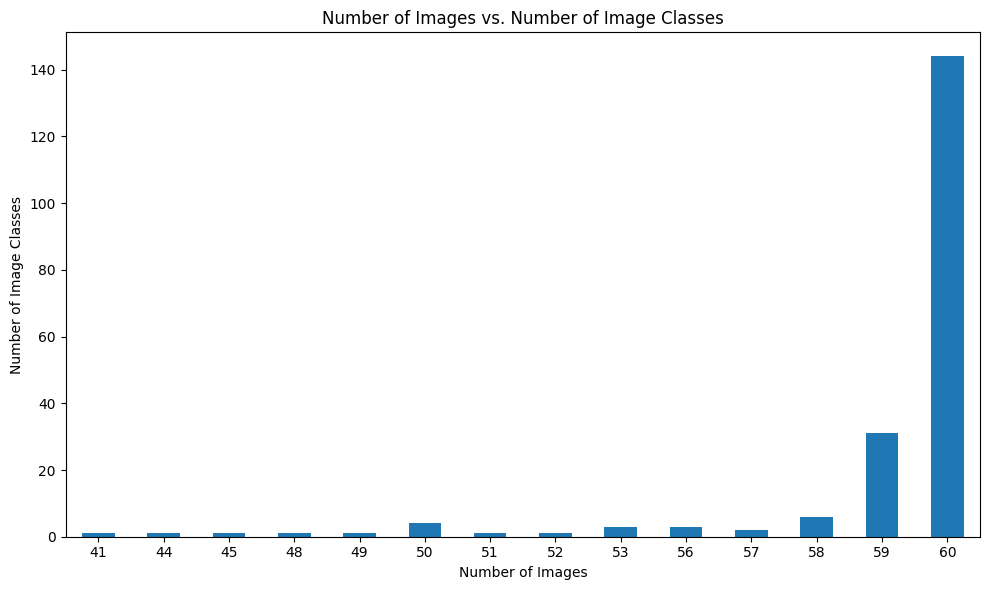

In [ ]:
# Grouping the data by class_id and counting the number of unique image_ids for each class
class_image_counts = image_data_1.groupby('class_id')['image_id'].nunique()

# Counting the frequency of each unique count of image_ids
image_count_distribution = class_image_counts.value_counts().sort_index()

# Plotting the distribution
plt.figure(figsize=(10, 6))
image_count_distribution.plot(kind='bar')
plt.title('Number of Images vs. Number of Image Classes')
plt.xlabel('Number of Images')
plt.ylabel('Number of Image Classes')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()



**Distribution of Original image**

Folders Progress:   0%|          | 0/201 [00:00<?, ?it/s]

Images Progress:   0%|          | 0/60 [00:00<?, ?it/s]

Images Progress:   0%|          | 0/60 [00:00<?, ?it/s]

Images Progress:   0%|          | 0/60 [00:00<?, ?it/s]

Images Progress:   0%|          | 0/60 [00:00<?, ?it/s]

Images Progress:   0%|          | 0/60 [00:00<?, ?it/s]

Images Progress:   0%|          | 0/50 [00:00<?, ?it/s]

Images Progress:   0%|          | 0/53 [00:00<?, ?it/s]

Images Progress:   0%|          | 0/59 [00:00<?, ?it/s]

Images Progress:   0%|          | 0/59 [00:00<?, ?it/s]

Images Progress:   0%|          | 0/60 [00:00<?, ?it/s]

Images Progress:   0%|          | 0/60 [00:00<?, ?it/s]

Images Progress:   0%|          | 0/45 [00:00<?, ?it/s]

Images Progress:   0%|          | 0/60 [00:00<?, ?it/s]

Images Progress:   0%|          | 0/60 [00:00<?, ?it/s]

Images Progress:   0%|          | 0/60 [00:00<?, ?it/s]

Images Progress:   0%|          | 0/60 [00:00<?, ?it/s]

Images Progress:   0%|          | 0/59 [00:00<?, ?it/s]

Images Progress:   0%|          | 0/59 [00:00<?, ?it/s]

Images Progress:   0%|          | 0/58 [00:00<?, ?it/s]

Images Progress:   0%|          | 0/60 [00:00<?, ?it/s]

Images Progress:   0%|          | 0/59 [00:00<?, ?it/s]

Images Progress:   0%|          | 0/60 [00:00<?, ?it/s]

Images Progress:   0%|          | 0/59 [00:00<?, ?it/s]

Images Progress:   0%|          | 0/60 [00:00<?, ?it/s]

Images Progress:   0%|          | 0/60 [00:00<?, ?it/s]

Images Progress:   0%|          | 0/60 [00:00<?, ?it/s]

Images Progress:   0%|          | 0/60 [00:00<?, ?it/s]

Images Progress:   0%|          | 0/60 [00:00<?, ?it/s]

Images Progress:   0%|          | 0/60 [00:00<?, ?it/s]

Images Progress:   0%|          | 0/51 [00:00<?, ?it/s]

Images Progress:   0%|          | 0/60 [00:00<?, ?it/s]

Images Progress:   0%|          | 0/59 [00:00<?, ?it/s]

Images Progress:   0%|          | 0/53 [00:00<?, ?it/s]

Images Progress:   0%|          | 0/60 [00:00<?, ?it/s]

Images Progress:   0%|          | 0/59 [00:00<?, ?it/s]

Images Progress:   0%|          | 0/60 [00:00<?, ?it/s]

Images Progress:   0%|          | 0/59 [00:00<?, ?it/s]

Images Progress:   0%|          | 0/49 [00:00<?, ?it/s]

Images Progress:   0%|          | 0/59 [00:00<?, ?it/s]

Images Progress:   0%|          | 0/59 [00:00<?, ?it/s]

Images Progress:   0%|          | 0/48 [00:00<?, ?it/s]

Images Progress:   0%|          | 0/60 [00:00<?, ?it/s]

Images Progress:   0%|          | 0/60 [00:00<?, ?it/s]

Images Progress:   0%|          | 0/60 [00:00<?, ?it/s]

Images Progress:   0%|          | 0/60 [00:00<?, ?it/s]

Images Progress:   0%|          | 0/60 [00:00<?, ?it/s]

Images Progress:   0%|          | 0/60 [00:00<?, ?it/s]

Images Progress:   0%|          | 0/60 [00:00<?, ?it/s]

Images Progress:   0%|          | 0/56 [00:00<?, ?it/s]

Images Progress:   0%|          | 0/60 [00:00<?, ?it/s]

Images Progress:   0%|          | 0/52 [00:00<?, ?it/s]

Images Progress:   0%|          | 0/60 [00:00<?, ?it/s]

Images Progress:   0%|          | 0/60 [00:00<?, ?it/s]

Images Progress:   0%|          | 0/60 [00:00<?, ?it/s]

Images Progress:   0%|          | 0/58 [00:00<?, ?it/s]

Images Progress:   0%|          | 0/60 [00:00<?, ?it/s]

Images Progress:   0%|          | 0/60 [00:00<?, ?it/s]

Images Progress:   0%|          | 0/60 [00:00<?, ?it/s]

Images Progress:   0%|          | 0/60 [00:00<?, ?it/s]

Images Progress:   0%|          | 0/60 [00:00<?, ?it/s]

Images Progress:   0%|          | 0/59 [00:00<?, ?it/s]

Images Progress:   0%|          | 0/59 [00:00<?, ?it/s]

Images Progress:   0%|          | 0/60 [00:00<?, ?it/s]

Images Progress:   0%|          | 0/60 [00:00<?, ?it/s]

Images Progress:   0%|          | 0/60 [00:00<?, ?it/s]

Images Progress:   0%|          | 0/60 [00:00<?, ?it/s]

Images Progress:   0%|          | 0/56 [00:00<?, ?it/s]

Images Progress:   0%|          | 0/57 [00:00<?, ?it/s]

Images Progress:   0%|          | 0/60 [00:00<?, ?it/s]

Images Progress:   0%|          | 0/60 [00:00<?, ?it/s]

Images Progress:   0%|          | 0/60 [00:00<?, ?it/s]

Images Progress:   0%|          | 0/60 [00:00<?, ?it/s]

Images Progress:   0%|          | 0/60 [00:00<?, ?it/s]

Images Progress:   0%|          | 0/60 [00:00<?, ?it/s]

Images Progress:   0%|          | 0/60 [00:00<?, ?it/s]

Images Progress:   0%|          | 0/60 [00:00<?, ?it/s]

Images Progress:   0%|          | 0/60 [00:00<?, ?it/s]

Images Progress:   0%|          | 0/60 [00:00<?, ?it/s]

Images Progress:   0%|          | 0/60 [00:00<?, ?it/s]

Images Progress:   0%|          | 0/60 [00:00<?, ?it/s]

Images Progress:   0%|          | 0/58 [00:00<?, ?it/s]

Images Progress:   0%|          | 0/59 [00:00<?, ?it/s]

Images Progress:   0%|          | 0/60 [00:00<?, ?it/s]

Images Progress:   0%|          | 0/60 [00:00<?, ?it/s]

Images Progress:   0%|          | 0/59 [00:00<?, ?it/s]

Images Progress:   0%|          | 0/56 [00:00<?, ?it/s]

Images Progress:   0%|          | 0/60 [00:00<?, ?it/s]

Images Progress:   0%|          | 0/60 [00:00<?, ?it/s]

Images Progress:   0%|          | 0/60 [00:00<?, ?it/s]

Images Progress:   0%|          | 0/60 [00:00<?, ?it/s]

Images Progress:   0%|          | 0/59 [00:00<?, ?it/s]

Images Progress:   0%|          | 0/60 [00:00<?, ?it/s]

Images Progress:   0%|          | 0/60 [00:00<?, ?it/s]

Images Progress:   0%|          | 0/60 [00:00<?, ?it/s]

Images Progress:   0%|          | 0/59 [00:00<?, ?it/s]

Images Progress:   0%|          | 0/60 [00:00<?, ?it/s]

Images Progress:   0%|          | 0/59 [00:00<?, ?it/s]

Images Progress:   0%|          | 0/60 [00:00<?, ?it/s]

Images Progress:   0%|          | 0/59 [00:00<?, ?it/s]

Images Progress:   0%|          | 0/60 [00:00<?, ?it/s]

Images Progress:   0%|          | 0/60 [00:00<?, ?it/s]

Images Progress:   0%|          | 0/59 [00:00<?, ?it/s]

Images Progress:   0%|          | 0/60 [00:00<?, ?it/s]

Images Progress:   0%|          | 0/50 [00:00<?, ?it/s]

Images Progress:   0%|          | 0/60 [00:00<?, ?it/s]

Images Progress:   0%|          | 0/50 [00:00<?, ?it/s]

Images Progress:   0%|          | 0/60 [00:00<?, ?it/s]

Images Progress:   0%|          | 0/60 [00:00<?, ?it/s]

Images Progress:   0%|          | 0/60 [00:00<?, ?it/s]

Images Progress:   0%|          | 0/60 [00:00<?, ?it/s]

Images Progress:   0%|          | 0/59 [00:00<?, ?it/s]

Images Progress:   0%|          | 0/60 [00:00<?, ?it/s]

Images Progress:   0%|          | 0/60 [00:00<?, ?it/s]

Images Progress:   0%|          | 0/60 [00:00<?, ?it/s]

Images Progress:   0%|          | 0/60 [00:00<?, ?it/s]

Images Progress:   0%|          | 0/60 [00:00<?, ?it/s]

Images Progress:   0%|          | 0/60 [00:00<?, ?it/s]

Images Progress:   0%|          | 0/60 [00:00<?, ?it/s]

Images Progress:   0%|          | 0/60 [00:00<?, ?it/s]

Images Progress:   0%|          | 0/60 [00:00<?, ?it/s]

Images Progress:   0%|          | 0/60 [00:00<?, ?it/s]

Images Progress:   0%|          | 0/60 [00:00<?, ?it/s]

Images Progress:   0%|          | 0/60 [00:00<?, ?it/s]

Images Progress:   0%|          | 0/60 [00:00<?, ?it/s]

Images Progress:   0%|          | 0/60 [00:00<?, ?it/s]

Images Progress:   0%|          | 0/60 [00:00<?, ?it/s]

Images Progress:   0%|          | 0/60 [00:00<?, ?it/s]

Images Progress:   0%|          | 0/50 [00:00<?, ?it/s]

Images Progress:   0%|          | 0/59 [00:00<?, ?it/s]

Images Progress:   0%|          | 0/60 [00:00<?, ?it/s]

Images Progress:   0%|          | 0/60 [00:00<?, ?it/s]

Images Progress:   0%|          | 0/60 [00:00<?, ?it/s]

Images Progress:   0%|          | 0/59 [00:00<?, ?it/s]

Images Progress:   0%|          | 0/60 [00:00<?, ?it/s]

Images Progress:   0%|          | 0/41 [00:00<?, ?it/s]

Images Progress:   0%|          | 0/60 [00:00<?, ?it/s]

Images Progress:   0%|          | 0/60 [00:00<?, ?it/s]

Images Progress:   0%|          | 0/60 [00:00<?, ?it/s]

Images Progress:   0%|          | 0/60 [00:00<?, ?it/s]

Images Progress:   0%|          | 0/60 [00:00<?, ?it/s]

Images Progress:   0%|          | 0/60 [00:00<?, ?it/s]

Images Progress:   0%|          | 0/60 [00:00<?, ?it/s]

Images Progress:   0%|          | 0/60 [00:00<?, ?it/s]

Images Progress:   0%|          | 0/60 [00:00<?, ?it/s]

Images Progress:   0%|          | 0/58 [00:00<?, ?it/s]

Images Progress:   0%|          | 0/60 [00:00<?, ?it/s]

Images Progress:   0%|          | 0/60 [00:00<?, ?it/s]

Images Progress:   0%|          | 0/60 [00:00<?, ?it/s]

Images Progress:   0%|          | 0/60 [00:00<?, ?it/s]

Images Progress:   0%|          | 0/59 [00:00<?, ?it/s]

Images Progress:   0%|          | 0/60 [00:00<?, ?it/s]

Images Progress:   0%|          | 0/60 [00:00<?, ?it/s]

Images Progress:   0%|          | 0/60 [00:00<?, ?it/s]

Images Progress:   0%|          | 0/57 [00:00<?, ?it/s]

Images Progress:   0%|          | 0/60 [00:00<?, ?it/s]

Images Progress:   0%|          | 0/60 [00:00<?, ?it/s]

Images Progress:   0%|          | 0/60 [00:00<?, ?it/s]

Images Progress:   0%|          | 0/60 [00:00<?, ?it/s]

Images Progress:   0%|          | 0/60 [00:00<?, ?it/s]

Images Progress:   0%|          | 0/60 [00:00<?, ?it/s]

Images Progress:   0%|          | 0/60 [00:00<?, ?it/s]

Images Progress:   0%|          | 0/60 [00:00<?, ?it/s]

Images Progress:   0%|          | 0/60 [00:00<?, ?it/s]

Images Progress:   0%|          | 0/60 [00:00<?, ?it/s]

Images Progress:   0%|          | 0/60 [00:00<?, ?it/s]

Images Progress:   0%|          | 0/60 [00:00<?, ?it/s]

Images Progress:   0%|          | 0/60 [00:00<?, ?it/s]

Images Progress:   0%|          | 0/60 [00:00<?, ?it/s]

Images Progress:   0%|          | 0/60 [00:00<?, ?it/s]

Images Progress:   0%|          | 0/60 [00:00<?, ?it/s]

Images Progress:   0%|          | 0/60 [00:00<?, ?it/s]

Images Progress:   0%|          | 0/53 [00:00<?, ?it/s]

Images Progress:   0%|          | 0/60 [00:00<?, ?it/s]

Images Progress:   0%|          | 0/59 [00:00<?, ?it/s]

Images Progress:   0%|          | 0/60 [00:00<?, ?it/s]

Images Progress:   0%|          | 0/59 [00:00<?, ?it/s]

Images Progress:   0%|          | 0/60 [00:00<?, ?it/s]

Images Progress:   0%|          | 0/59 [00:00<?, ?it/s]

Images Progress:   0%|          | 0/60 [00:00<?, ?it/s]

Images Progress:   0%|          | 0/60 [00:00<?, ?it/s]

Images Progress:   0%|          | 0/60 [00:00<?, ?it/s]

Images Progress:   0%|          | 0/60 [00:00<?, ?it/s]

Images Progress:   0%|          | 0/59 [00:00<?, ?it/s]

Images Progress:   0%|          | 0/59 [00:00<?, ?it/s]

Images Progress:   0%|          | 0/60 [00:00<?, ?it/s]

Images Progress:   0%|          | 0/60 [00:00<?, ?it/s]

Images Progress:   0%|          | 0/59 [00:00<?, ?it/s]

Images Progress:   0%|          | 0/60 [00:00<?, ?it/s]

Images Progress:   0%|          | 0/60 [00:00<?, ?it/s]

Images Progress:   0%|          | 0/60 [00:00<?, ?it/s]

Images Progress:   0%|          | 0/58 [00:00<?, ?it/s]

Images Progress:   0%|          | 0/60 [00:00<?, ?it/s]

Images Progress:   0%|          | 0/60 [00:00<?, ?it/s]

Images Progress:   0%|          | 0/60 [00:00<?, ?it/s]

Images Progress:   0%|          | 0/60 [00:00<?, ?it/s]

Images Progress:   0%|          | 0/60 [00:00<?, ?it/s]

Images Progress:   0%|          | 0/60 [00:00<?, ?it/s]

Images Progress:   0%|          | 0/44 [00:00<?, ?it/s]

Images Progress:   0%|          | 0/59 [00:00<?, ?it/s]

Images Progress:   0%|          | 0/58 [00:00<?, ?it/s]

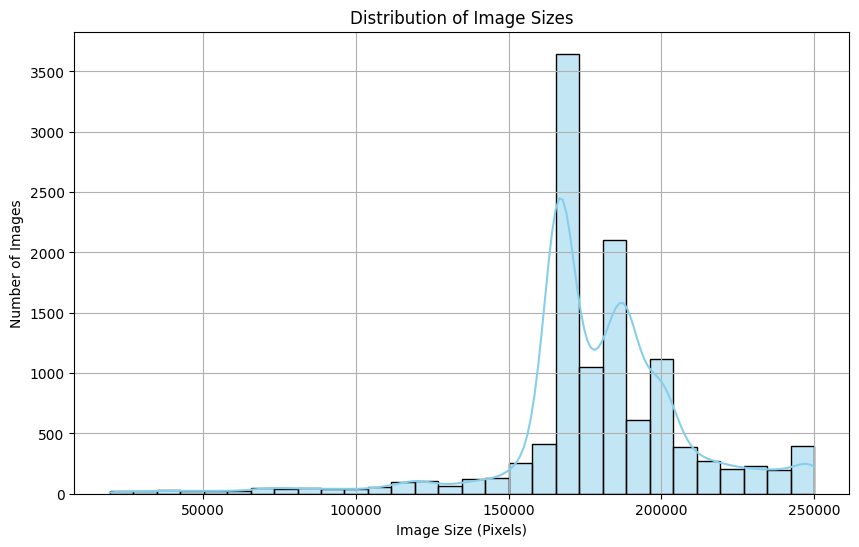

In [ ]:
import os
from PIL import Image
from tqdm.notebook import tqdm  # Import tqdm for Colab
import numpy as np

# Define a function to get the original size of an image
def get_image_size(image_path):
    with Image.open(image_path) as img:
        width, height = img.size
    return width * height

# Path to the root directory containing class folders
root_dir = "drive/MyDrive/CUB_200_2011/images/"

# Initialize empty list to store image sizes
image_sizes = []

# Iterate through each class folder
for class_folder in tqdm(os.listdir(root_dir), desc='Folders Progress'):  # Use tqdm for progress visualization
    class_path = os.path.join(root_dir, class_folder)

    # Skip any non-directory files (e.g., .DS_Store)
    if not os.path.isdir(class_path):
        continue

    # Iterate through each image file in the class folder
    for image_file in tqdm(os.listdir(class_path), desc='Images Progress', leave=False):  # Use tqdm for progress visualization
        # Construct the full path to the image file
        image_path = os.path.join(class_path, image_file)

        # Get the original size of the image and append to the list
        size = get_image_size(image_path)
        image_sizes.append(size)
# Convert the list to a NumPy array
image_sizes = np.array(image_sizes)

# Plotting the histogram
plt.figure(figsize=(10, 6))
sns.histplot(image_sizes, bins=30, kde=True, color='skyblue', edgecolor='black')

plt.title('Distribution of Image Sizes')
plt.xlabel('Image Size (Pixels)')
plt.ylabel('Number of Images')
plt.grid(True)
plt.show()




In [ ]:
# 1. Distribution of Image Sizes (Width x Height)
image_data_1['image_size'] = image_data_1['width'] * image_data_1['height']
image_size_distribution = image_data_1['image_size'].describe()
print("Distribution of Image Sizes (Width x Height):")
print(image_size_distribution)




Distribution of Image Sizes (Width x Height):
count     11788.000000
mean      61297.114947
std       33066.776278
min       10200.000000
25%       35640.000000
50%       55529.000000
75%       79869.750000
max      245021.000000
Name: image_size, dtype: float64


Text(0.5, 1.0, '# of images per class for training')

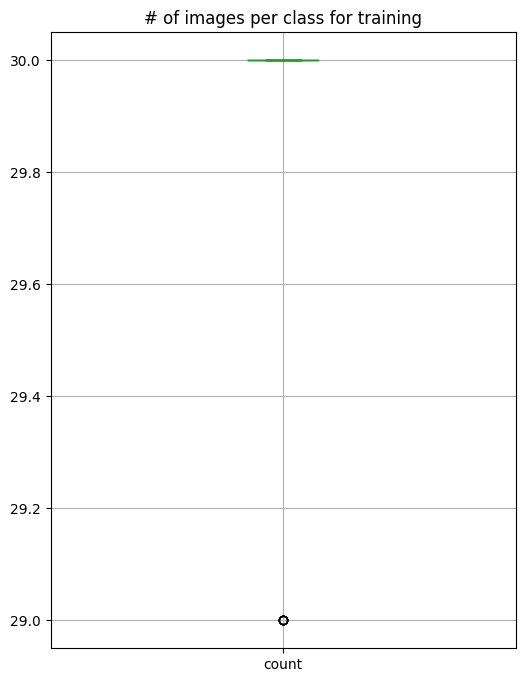

In [ ]:
df6 = image_class_labels_1.merge(train_test_split_1, how='inner', on='image_id')
df_6_train = df6.loc[df6['is_training_image']==1].drop('is_training_image', axis=1)
df_6_test = df6.loc[df6['is_training_image']==0].drop('is_training_image', axis=1)
df_6_train = df_6_train['class_id'].value_counts().sort_index()
df_6_test = df_6_test['class_id'].value_counts().sort_index()
class_image_train_1 =classes_1.merge(df_6_train, how='inner', on='class_id').drop('class_id', axis=1)
class_image_test_1 =classes_1.merge(df_6_test, how='inner', on='class_id').drop('class_id', axis=1)
class_image_train_boxp= class_image_train_1.boxplot(column=['count'],figsize=(6,8))
class_image_train_boxp.set_title('# of images per class for training')


Text(0.5, 1.0, '# of images per class for testing')

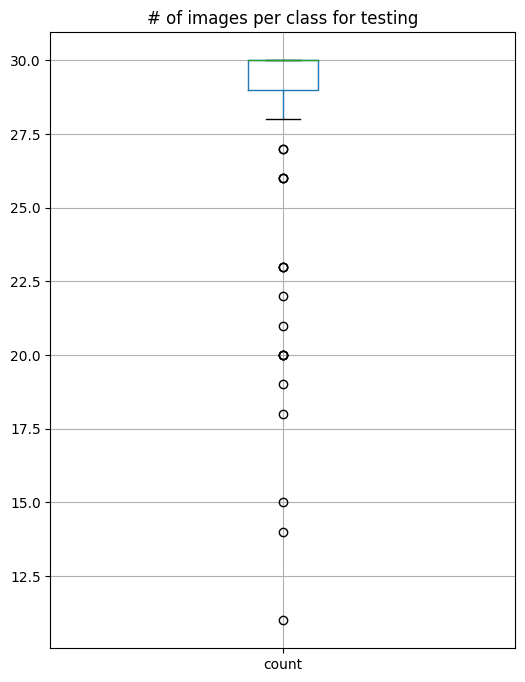

In [ ]:
class_image_test_boxp = class_image_test_1.boxplot(column=['count'],figsize=(6,8))
class_image_test_boxp.set_title('# of images per class for testing')

In [ ]:
# Below is the code used to make the confusion matrix from the csv file containing the testing data 
# performance metrics of our best model
import numpy as np
from sklearn import metrics
import pandas as pd
import matplotlib.pyplot as plt
 
# load the prediction_truth matrix
prediction_truth = pd.read_csv('D:\Cardiff U\Spring Semester\CMT307\course work\datas\metrics.csv', sep=',', header=None, names=['image_name', 'predicted', 'truth'],)
prediction_truth_30 = pd.read_csv('D:\Cardiff U\Spring Semester\CMT307\course work\datas\metrics_30.csv', sep=',', header=None, names=['image_name', 'predicted', 'truth'],)
 
# creat variable for confusion matrix for class 30
x_predicted_30 = prediction_truth_30['predicted']
y_truth_30 = prediction_truth_30['truth']
 
print(prediction_truth_30)
 
# generate confusion matrix for class 30
cm_30 = metrics.confusion_matrix(y_truth_30, x_predicted_30)
cm_display_30 = metrics.ConfusionMatrixDisplay(confusion_matrix = cm_30)
 
# display the confusion matrix
cm_display_30.plot()
plt.show()

'''@techreport{WahCUB_200_2011,
	Title = ,
	Author = {Wah, C. and Branson, S. and Welinder, P. and Perona, P. and Belongie, S.},
	Year = {2011}
	Institution = {California Institute of Technology},
	Number = {CNS-TR-2011-001}
}'''